In [1]:
!pip install xgboost
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Base de datos "airbnb-listings-extract.csv", con las columas:

- ID: Identificador único del listado.
- Listing Url: URL del listado en Airbnb.
- Scrape ID: Identificador único de la extracción de datos.
- Last Scraped: Fecha de la última extracción de datos del listado.
- Name: Nombre del alojamiento.
- Summary: Resumen del alojamiento.
- Space: Descripción del espacio del alojamiento.
- Description: Descripción detallada del alojamiento.
- Experiences Offered: Experiencias ofrecidas por el anfitrión.
- Neighborhood Overview: Descripción general del vecindario.
- Notes: Notas adicionales sobre el alojamiento.
- Transit: Información sobre el transporte público cercano.
- Access: Detalles sobre el acceso al alojamiento.
- Interaction: Información sobre la interacción con el anfitrión.
- House Rules: Reglas de la casa establecidas por el anfitrión.
- Thumbnail Url: URL de la imagen en miniatura del alojamiento.
- Medium Url: URL de la imagen en tamaño mediano del alojamiento.
- Picture Url: URL de la imagen del alojamiento.
- XL Picture Url: URL de la imagen en tamaño extra grande del alojamiento.
- Host ID: Identificador único del anfitrión.
- Host URL: URL del perfil del anfitrión en Airbnb.
- Host Name: Nombre del anfitrión.
- Host Since: Fecha en la que el anfitrión se registró en Airbnb.
- Host Location: Ubicación del anfitrión.
- Host About: Descripción del anfitrión.
- Host Response Time: Tiempo de respuesta del anfitrión.
- Host Response Rate: Tasa de respuesta del anfitrión.
- Host Acceptance Rate: Tasa de aceptación de reservas del anfitrión.
- Host Thumbnail Url: URL de la imagen en miniatura del perfil del anfitrión.
- Host Picture Url: URL de la imagen del perfil del anfitrión.
- Host Neighbourhood: Vecindario del anfitrión.
- Host Listings Count: Cantidad de listados que el anfitrión tiene en Airbnb.
- Host Total Listings Count: Cantidad total de listados del anfitrión, incluyendo los no disponibles actualmente.
- Host Verifications: Verificaciones realizadas al anfitrión.
- Street: Calle del alojamiento.
- Neighbourhood: Vecindario del alojamiento.
- Neighbourhood Cleansed: Vecindario del alojamiento después de la limpieza de datos.
- Neighbourhood Group Cleansed: Grupo de vecindarios del alojamiento después de la limpieza de datos.
- City: Ciudad del alojamiento.
- State: Estado del alojamiento.
- Zipcode: Código postal del alojamiento.
- Market: Mercado en el que se encuentra el alojamiento.
- Smart Location: Ubicación inteligente que combina ciudad, estado y código postal.
- Country Code: Código del país del alojamiento.
- Country: País del alojamiento.
- Latitude: Latitud geográfica del alojamiento.
- Longitude: Longitud geográfica del alojamiento.
- Property Type: Tipo de propiedad (apartamento, casa, etc.).
- Room Type: Tipo de habitación (habitación privada, casa entera, etc.).
- Accommodates: Número máximo de personas que puede acomodar el alojamiento.
- Bathrooms: Cantidad de baños en el alojamiento.
- Bedrooms: Cantidad de habitaciones en el alojamiento.
- Beds: Cantidad de camas en el alojamiento.
- Bed Type: Tipo de cama ofrecida.
- Amenities: Comodidades y servicios ofrecidos.
- Square Feet: Metros cuadrados del alojamiento.
- Price: Precio por noche del alojamiento.
- Weekly Price: Precio por semana del alojamiento.
- Monthly Price: Precio por mes del alojamiento.
- Security Deposit: Depósito de seguridad requerido.
- Cleaning Fee: Tarifa de limpieza adicional.
- Guests Included: Número de huéspedes incluidos en el precio base.
- Extra People: Cantidad de personas adicionales permitidas y el costo adicional.
- Minimum Nights: Estadía mínima requerida.
- Maximum Nights: Estadía máxima permitida.
- Calendar Updated: Fecha en la que se actualizó el calendario de disponibilidad.
- Has Availability: Indicador de disponibilidad del alojamiento.
- Availability 30: Número de días disponibles en los próximos 30 días.
- Availability 60: Número de días disponibles en los próximos 60 días.
- Availability 90: Número de días disponibles en los próximos 90 días.
- Availability 365: Número de días disponibles en el próximo año.
- Calendar last Scraped: Fecha en la que se extrajo por última vez el calendario de disponibilidad.
- Number of Reviews: Cantidad de reseñas del alojamiento.
- First Review: Fecha de la primera reseña del alojamiento.
- Last Review: Fecha de la última reseña del alojamiento.
- Review Scores Rating: Puntuación general de las reseñas.
- Review Scores Accuracy: Puntuación de la precisión según las reseñas.
- Review Scores Cleanliness: Puntuación de la limpieza según las reseñas.
- Review Scores Checkin: Puntuación del proceso de registro según las reseñas.
- Review Scores Communication: Puntuación de la comunicación según las reseñas.
- Review Scores Location: Puntuación de la ubicación según las reseñas.
- Review Scores Value: Puntuación de la relación calidad-precio según las reseñas.
- License: Licencia del alojamiento.
- Jurisdiction Names: Nombres de las jurisdicciones donde se encuentra el alojamiento.
- Cancellation Policy: Política de cancelación del alojamiento.
- Calculated host listings count: Cantidad de listados calculada para el anfitrión.
- Reviews per Month: Cantidad promedio de reseñas por mes.
- Geolocation: Geolocalización del alojamiento.
- Features: Características adicionales del alojamiento.

# Preparación de datos:



In [2]:
# cargamos librerías necesarias
import numpy  as np
import pandas as pd
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt # para dibujar
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [3]:
import pandas as pd

# Especifica la ruta y el nombre del archivo CSV
ruta_archivo = "/content/airbnb-listings.csv"

separador = ";"

# Lee el archivo CSV con el separador especificado y crea un DataFrame
full_df = pd.read_csv(ruta_archivo, sep=separador , decimal='.')

In [4]:
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('train.csv', sep=';', decimal='.', index=False)
test.to_csv('test.csv', sep=';', decimal='.', index=False)



Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [5]:
# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él.

data = pd.read_csv('train.csv', sep=';', decimal='.')

# Análisis exploratori

**Vizualizacion inicial de la base de datos**

In [6]:

data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,8308944,https://www.airbnb.com/rooms/8308944,20170407214119,2017-04-08,BOHEMIAN HOME - LA LATINA.,"Beautiful apartment in La Latina, central Madr...",Beautiful apartment in La Latina in central Ma...,"Beautiful apartment in La Latina, central Madr...",none,In La Latina neighborhood in central Madrid. R...,...,10.0,9.0,9.0,NaN,NaN,moderate,7.0,1.40,"40.40817613819094, -3.708096711234473","Host Has Profile Pic,Host Identity Verified,Re..."
1,18104306,https://www.airbnb.com/rooms/18104306,20170407214050,2017-04-08,Smart City Centre Apartment I,"Unique apartment in vibrant neighborhoods, car...",This apartment has two self-contained bedrooms...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.38839456734209, 2.1553118896394188","Host Has Profile Pic,Host Identity Verified,Is..."
2,13060669,https://www.airbnb.com/rooms/13060669,20170407214119,2017-04-08,Luminoso y colorido ático en Colón.,"Ático muy luminoso con ascensor, con vigas de ...","Piso tranquilo de dos habitaciones, salón ampl...","Ático muy luminoso con ascensor, con vigas de ...",none,"Situado en pleno centro de Madrid, en la mejor...",...,10.0,10.0,9.0,NaN,NaN,strict,1.0,0.22,"40.42573172068408, -3.6944054389736665","Host Has Profile Pic,Is Location Exact,Require..."
3,17134080,https://www.airbnb.com/rooms/17134080,20170407214119,2017-04-08,Estupendo Piso en zona centrica de Madrid,"Te encantará por las vistas, la amplitud, la t...","Piso amplio, espectaculares vistas, muy acoged...","Te encantará por las vistas, la amplitud, la t...",none,"Centrico, tranquilo y seguro. Cerca de zona de...",...,NaN,NaN,NaN,NaN,NaN,flexible,3.0,NaN,"40.445167209572084, -3.7036311114059046","Host Has Profile Pic,Host Identity Verified,Re..."
4,10464183,https://www.airbnb.com/rooms/10464183,20170407214119,2017-04-08,CHALET 13 (FANTASY),"Magnifico chalet, de tres alturas, situado en ...",Decoracion FANTASY,"Magnifico chalet, de tres alturas, situado en ...",none,NaN,...,9.0,9.0,9.0,NaN,NaN,strict,4.0,1.46,"40.46678161688102, -3.6518301005082128","Host Has Profile Pic,Is Location Exact,Require..."


In [7]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10270.000000,11822.000000,11822.000000,11824.000000,11824.000000,11824.000000,11777.000000,...,11824.000000,9183.000000,9168.000000,9173.000000,9159.000000,9172.000000,9156.000000,9155.000000,11822.000000,9295.000000
mean,1.027902e+07,2.017038e+13,3.617024e+07,94.963194,12.556589,12.556589,40.485121,-3.794814,3.284083,1.285302,...,22.775880,91.708919,9.418412,9.334024,9.620046,9.645770,9.533421,9.217695,9.560734,1.869656
std,5.554541e+06,5.426972e+08,3.436318e+07,14.912907,34.101259,34.101259,4.747156,14.087092,2.109190,0.665845,...,38.551459,9.023270,0.929791,0.995879,0.810485,0.772589,0.775567,0.959135,23.768787,1.866299
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.842522,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.570512e+06,2.017041e+13,6.840576e+06,100.000000,1.000000,1.000000,40.409718,-3.707599,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.131646e+07,2.017041e+13,2.474598e+07,100.000000,2.000000,2.000000,40.419466,-3.700737,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.532085e+07,2.017041e+13,5.445936e+07,100.000000,6.000000,6.000000,40.430913,-3.683446,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.790000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11342 non-null  object 
 6   Space                           8748 non-null   object 
 7   Description                     11819 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7325 non-null   object 
 10  Notes                           4515 non-null   object 
 11  Transit                         7285 non-null   object 
 12  Access                          

In [9]:
columnas = data.columns
columnas

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [10]:
# Renombrar la columna "Price" a "Precio"
data.rename(columns={'Price': 'Precio'}, inplace=True)

In [11]:
# Extraer la columna "Precio"
price_column = data['Precio']

# Eliminar la columna "Precio" del DataFrame
data.drop('Precio', axis=1, inplace=True)

# Insertar la columna "Price" en la primera posición del DataFrame
data.insert(0, 'Precio', price_column)

In [12]:
data['Precio'].value_counts()

50.0     534
60.0     458
30.0     451
25.0     416
35.0     390
        ... 
338.0      1
335.0      1
638.0      1
111.0      1
455.0      1
Name: Precio, Length: 355, dtype: int64

<ipython-input-13-ca60663e1f20>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(data.drop(['Precio'], axis=1).corr())
<ipython-input-13-ca60663e1f20>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


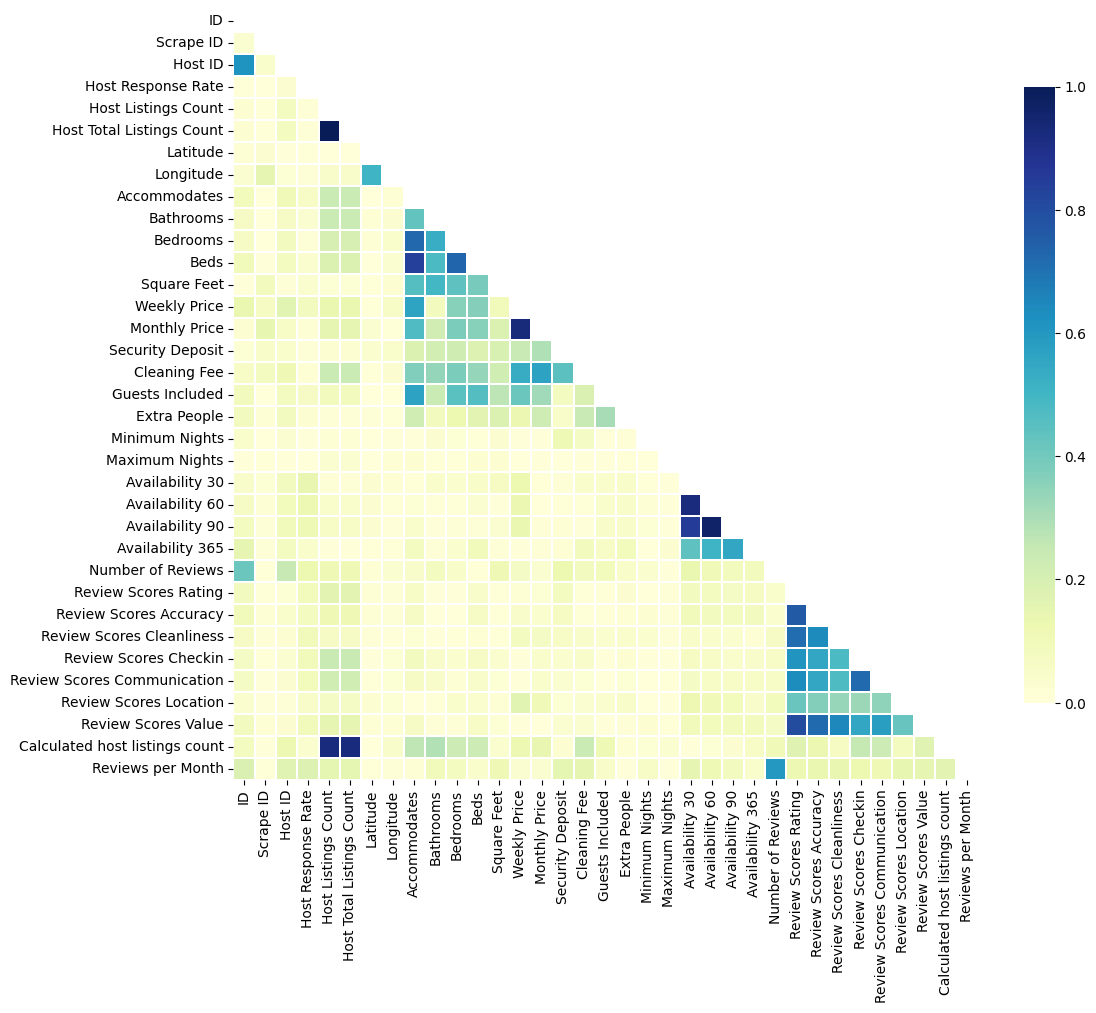

In [13]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data.drop(['Precio'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

#Preprocesamiento

Exploracion de las caracteristicas: Revision de todas las columnas de 10 en 10 y visualizacion de algunas caracteristicas

In [14]:
columnas_seleccionadas = data.iloc[:, 80:]
columnas_seleccionadas

,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,9.0,9.0,NaN,NaN,moderate,7.0,1.40,"40.40817613819094, -3.708096711234473","Host Has Profile Pic,Host Identity Verified,Re..."
1,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.38839456734209, 2.1553118896394188","Host Has Profile Pic,Host Identity Verified,Is..."
2,10.0,9.0,NaN,NaN,strict,1.0,0.22,"40.42573172068408, -3.6944054389736665","Host Has Profile Pic,Is Location Exact,Require..."
3,NaN,NaN,NaN,NaN,flexible,3.0,NaN,"40.445167209572084, -3.7036311114059046","Host Has Profile Pic,Host Identity Verified,Re..."
4,9.0,9.0,NaN,NaN,strict,4.0,1.46,"40.46678161688102, -3.6518301005082128","Host Has Profile Pic,Is Location Exact,Require..."
...,...,...,...,...,...,...,...,...,...
11819,NaN,NaN,NaN,NaN,strict,38.0,NaN,"40.416969878773706, -3.707364202785128","Host Has Profile Pic,Is Location Exact,Require..."
11820,10.0,10.0,NaN,NaN,moderate,1.0,2.74,"40.39199148722438, -3.6928037905825493","Host Is Superhost,Host Has Profile Pic,Host Id..."
11821,10.0,10.0,NaN,NaN,strict,13.0,4.00,"40.413707599476155, -3.706637521833094","Host Is Superhost,Host Has Profile Pic,Host Id..."
11822,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.425826436727334, -3.711995238288102","Host Has Profile Pic,Requires License,Instant ..."


In [15]:
columnas_seleccionadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Review Scores Location          9156 non-null   float64
 1   Review Scores Value             9155 non-null   float64
 2   License                         276 non-null    object 
 3   Jurisdiction Names              178 non-null    object 
 4   Cancellation Policy             11824 non-null  object 
 5   Calculated host listings count  11822 non-null  float64
 6   Reviews per Month               9295 non-null   float64
 7   Geolocation                     11824 non-null  object 
 8   Features                        11824 non-null  object 
dtypes: float64(4), object(5)
memory usage: 831.5+ KB


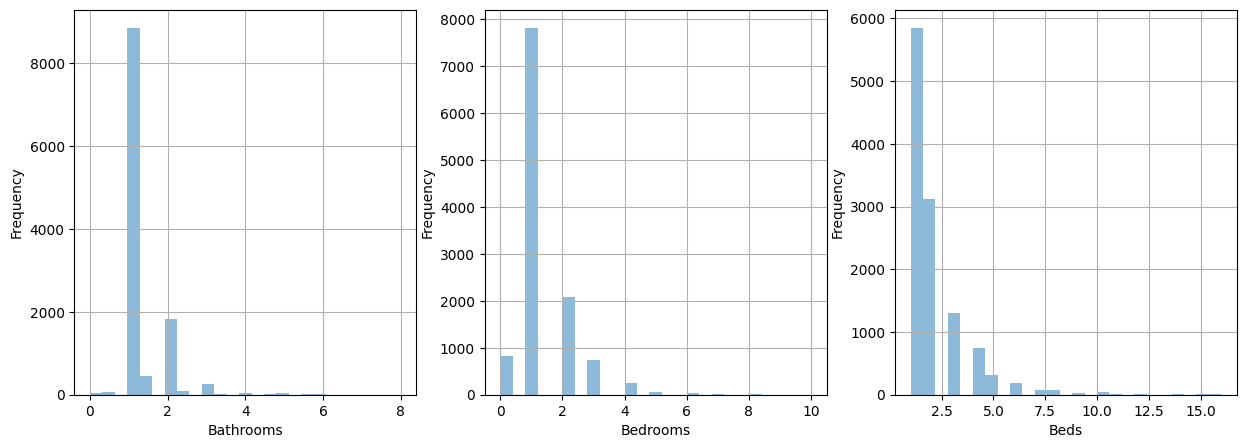

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(1,3,2)
data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.subplot(1,3,3)
data['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')

plt.show()

Para empezar nos enfocamos en datos que relacionados con Madrid

In [17]:
valores_unicos = data["City"].unique()
(valores_unicos)

array(['Madrid', 'Barcelona', '马德里', 'Palma',
       'Madrid, Comunidad de Madrid, ES', 'Wien', 'Dublin', 'London',
       'Sóller', 'Berlin', 'Paris', 'Brooklyn', 'Deià', 'Los Angeles',
       'New Orleans', 'Sant Llorenç des Cardassar', 'Inca', 'Muro',
       'Roma', 'Selva', 'Aravaca (Madrid)', 'Templeogue', 'Búger',
       'Alcúdia', 'Hong Kong', 'Genève', 'Illes Balears', 'Chicago',
       'Forest Lodge', 'Palma de Mallorca', 'Binissalem',
       'Santa Margalida', 'New York', 'Albert Park', 'madrid',
       'Washington', 'Toronto', 'Amsterdam', 'Mancor de la Vall',
       'Bondi Beach', 'Campos', 'Mal Pas-Bon Aire', 'Manacor', 'Queens',
       'Montréal', 'Ginebra', 'Málaga', 'Andratx', 'Son Vida', 'La Elipa',
       'Portals Nous', 'Pollença', 'Santa Maria del Camí', 'Copenhagen',
       'Costa dels Pins', 'Boston', 'Athens', 'Seattle', 'Sineu',
       'Richmond', 'Can Picafort', 'Colonia Sant Pere', 'Melbourne',
       "Port d'Andratx", nan, 'Clongriffin', 'København', 'Illetes

In [18]:
# Cuenta los valores NaN en la columna "City"
nan_count = data["City"].isna().sum()

# Imprime el conteo de valores NaN en la columna "City"
print("Cantidad de valores NaN en la columna 'City':", nan_count)

Cantidad de valores NaN en la columna 'City': 4


In [19]:
# Elimina las filas que contienen NaN en la columna "City"
data = data.dropna(subset=["City"])

# Imprime el DataFrame sin las filas con NaN en "City"
data

,Precio,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,64.0,8308944,https://www.airbnb.com/rooms/8308944,20170407214119,2017-04-08,BOHEMIAN HOME - LA LATINA.,"Beautiful apartment in La Latina, central Madr...",Beautiful apartment in La Latina in central Ma...,"Beautiful apartment in La Latina, central Madr...",none,...,10.0,9.0,9.0,NaN,NaN,moderate,7.0,1.40,"40.40817613819094, -3.708096711234473","Host Has Profile Pic,Host Identity Verified,Re..."
1,149.0,18104306,https://www.airbnb.com/rooms/18104306,20170407214050,2017-04-08,Smart City Centre Apartment I,"Unique apartment in vibrant neighborhoods, car...",This apartment has two self-contained bedrooms...,"Unique apartment in vibrant neighborhoods, car...",none,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.38839456734209, 2.1553118896394188","Host Has Profile Pic,Host Identity Verified,Is..."
2,124.0,13060669,https://www.airbnb.com/rooms/13060669,20170407214119,2017-04-08,Luminoso y colorido ático en Colón.,"Ático muy luminoso con ascensor, con vigas de ...","Piso tranquilo de dos habitaciones, salón ampl...","Ático muy luminoso con ascensor, con vigas de ...",none,...,10.0,10.0,9.0,NaN,NaN,strict,1.0,0.22,"40.42573172068408, -3.6944054389736665","Host Has Profile Pic,Is Location Exact,Require..."
3,69.0,17134080,https://www.airbnb.com/rooms/17134080,20170407214119,2017-04-08,Estupendo Piso en zona centrica de Madrid,"Te encantará por las vistas, la amplitud, la t...","Piso amplio, espectaculares vistas, muy acoged...","Te encantará por las vistas, la amplitud, la t...",none,...,NaN,NaN,NaN,NaN,NaN,flexible,3.0,NaN,"40.445167209572084, -3.7036311114059046","Host Has Profile Pic,Host Identity Verified,Re..."
4,155.0,10464183,https://www.airbnb.com/rooms/10464183,20170407214119,2017-04-08,CHALET 13 (FANTASY),"Magnifico chalet, de tres alturas, situado en ...",Decoracion FANTASY,"Magnifico chalet, de tres alturas, situado en ...",none,...,9.0,9.0,9.0,NaN,NaN,strict,4.0,1.46,"40.46678161688102, -3.6518301005082128","Host Has Profile Pic,Is Location Exact,Require..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,23.0,5925792,https://www.airbnb.com/rooms/5925792,20170407214119,2017-04-08,Spacious and modern room (4) in Sol,Spacious room in modern and recently apartment...,Spacious outside room with single bed and very...,Spacious room in modern and recently apartment...,none,...,NaN,NaN,NaN,NaN,NaN,strict,38.0,NaN,"40.416969878773706, -3.707364202785128","Host Has Profile Pic,Is Location Exact,Require..."
11820,30.0,9400839,https://www.airbnb.com/rooms/9400839,20170407214119,2017-04-08,Well located flat by Madrid Rio,"Hi, we're Joel and Sandra, a couple of young a...",Your bedroom has a Double Size bed with very c...,"Hi, we're Joel and Sandra, a couple of young a...",none,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,2.74,"40.39199148722438, -3.6928037905825493","Host Is Superhost,Host Has Profile Pic,Host Id..."
11821,70.0,17662475,https://www.airbnb.com/rooms/17662475,20170407214119,2017-04-08,SOL / PLAZA MAYOR ** Cosy & Modern Apartment**,Estupendo apartamento moderno y totalmente ref...,"Apartamento nuevo, céntrico, luminoso, silenci...",Estupendo apartamento moderno y totalmente ref...,none,...,10.0,10.0,10.0,NaN,NaN,strict,13.0,4.00,"40.413707599476155, -3.706637521833094","Host Is Superhost,Host Has Profile Pic,Host Id..."
11822,328.0,18087055,https://www.airbnb.com/rooms/18087055,20170407214119,2017-04-08,Piso +300m lujo A 100m PLAZA ESPAÑA,Piso de lujo de +300m a 30m de VENTURA RODRÍGU...,NaN,Piso de lujo de +300m a 30m de VENTURA RODRÍGU...,none,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.425826436727334, -3.711995238288102","Host Has Profile Pic,Requires License,Instant ..."


In [20]:
# Cuenta los valores NaN en la columna "City"
nan_count = data["City"].isna().sum()

# Imprime el conteo de valores NaN en la columna "City"
print("Cantidad de valores NaN en la columna 'City':", nan_count)

Cantidad de valores NaN en la columna 'City': 0


Eliminacion de datos que no sean de Madrid

In [21]:
valores_unicos = data["City"].unique()
(valores_unicos)

array(['Madrid', 'Barcelona', '马德里', 'Palma',
       'Madrid, Comunidad de Madrid, ES', 'Wien', 'Dublin', 'London',
       'Sóller', 'Berlin', 'Paris', 'Brooklyn', 'Deià', 'Los Angeles',
       'New Orleans', 'Sant Llorenç des Cardassar', 'Inca', 'Muro',
       'Roma', 'Selva', 'Aravaca (Madrid)', 'Templeogue', 'Búger',
       'Alcúdia', 'Hong Kong', 'Genève', 'Illes Balears', 'Chicago',
       'Forest Lodge', 'Palma de Mallorca', 'Binissalem',
       'Santa Margalida', 'New York', 'Albert Park', 'madrid',
       'Washington', 'Toronto', 'Amsterdam', 'Mancor de la Vall',
       'Bondi Beach', 'Campos', 'Mal Pas-Bon Aire', 'Manacor', 'Queens',
       'Montréal', 'Ginebra', 'Málaga', 'Andratx', 'Son Vida', 'La Elipa',
       'Portals Nous', 'Pollença', 'Santa Maria del Camí', 'Copenhagen',
       'Costa dels Pins', 'Boston', 'Athens', 'Seattle', 'Sineu',
       'Richmond', 'Can Picafort', 'Colonia Sant Pere', 'Melbourne',
       "Port d'Andratx", 'Clongriffin', 'København', 'Illetes',
  

In [22]:
# Filtra los valores de la columna "City" que contienen "Madrid" (sin distinguir mayúsculas y minúsculas)
filtro = data["City"].str.contains("Madrid", case=False)

# Aplica el filtro al DataFrame
resultados = data[filtro]

In [23]:
#porcentaje eliminado
print((len(data["City"]) - len(resultados))/len(data["City"])*100)

10.372250423011845


In [24]:
resultados_unicos = resultados["City"].unique()
(resultados_unicos)

array(['Madrid', 'Madrid, Comunidad de Madrid, ES', 'Aravaca (Madrid)',
       'madrid', 'Delicias-Madrid', 'las matas  madrid', 'Chueca, Madrid',
       'MADRID', 'Madrid, Vallecas (Fontarrón)', 'Comunidad de Madrid'],
      dtype=object)

Comprobacion usando otra columna para ver si hay otros estados

In [25]:
valores_unicos_State = resultados["State"].unique()
(valores_unicos_State)

array(['Comunidad de Madrid', 'Madrid', 'Community of Madrid', nan,
       'madrid', 'Autonome Gemeinschaft Madrid', 'Usera', 'Espańa',
       'Spain', 'Madrid \nMadrid', 'Communauté de Madrid', 'España',
       'MADRID', '28', 'Madrid, Spain'], dtype=object)

In [26]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10594 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Precio                          10585 non-null  float64
 1   ID                              10594 non-null  int64  
 2   Listing Url                     10594 non-null  object 
 3   Scrape ID                       10594 non-null  int64  
 4   Last Scraped                    10594 non-null  object 
 5   Name                            10594 non-null  object 
 6   Summary                         10200 non-null  object 
 7   Space                           7771 non-null   object 
 8   Description                     10589 non-null  object 
 9   Experiences Offered             10594 non-null  object 
 10  Neighborhood Overview           6660 non-null   object 
 11  Notes                           4019 non-null   object 
 12  Transit                         

In [27]:
resultados.corr() # matriz de correlación

<ipython-input-27-1600156d4679>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  resultados.corr() # matriz de correlación


,Precio,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
Precio,1.000000,-0.029053,NaN,-0.074912,-0.014693,0.197004,0.197004,0.066263,-0.024622,0.591489,...,-0.037438,0.052860,0.059052,0.085943,-0.016312,-0.006709,0.131727,0.020279,0.167095,-0.068134
ID,-0.029053,1.000000,NaN,0.618625,0.015345,-0.027189,-0.027189,0.005709,0.024270,-0.058720,...,-0.425860,0.100980,0.108492,0.071131,0.081434,0.086335,0.036037,0.094019,-0.066250,0.188079
Scrape ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host ID,-0.074912,0.618625,NaN,1.000000,-0.029377,-0.096409,-0.096409,-0.013121,0.034054,-0.074279,...,-0.258937,0.032340,0.049737,0.034103,0.042928,0.040676,-0.021008,0.039317,-0.115073,0.156719
Host Response Rate,-0.014693,0.015345,NaN,-0.029377,1.000000,-0.050223,-0.050223,-0.031648,-0.024882,0.054967,...,0.135802,0.101737,0.084554,0.102962,0.112850,0.103219,0.055202,0.102269,-0.073503,0.186103
Host Listings Count,0.197004,-0.027189,NaN,-0.096409,-0.050223,1.000000,1.000000,0.003943,-0.043252,0.134526,...,-0.092196,-0.170667,-0.120274,-0.059974,-0.236438,-0.218287,-0.023379,-0.155990,0.928179,-0.130715
Host Total Listings Count,0.197004,-0.027189,NaN,-0.096409,-0.050223,1.000000,1.000000,0.003943,-0.043252,0.134526,...,-0.092196,-0.170667,-0.120274,-0.059974,-0.236438,-0.218287,-0.023379,-0.155990,0.928179,-0.130715
Latitude,0.066263,0.005709,NaN,-0.013121,-0.031648,0.003943,0.003943,1.000000,0.245143,-0.006504,...,-0.064428,0.001290,0.004811,-0.005551,0.012755,0.009967,0.044835,-0.001376,0.006465,-0.069248
Longitude,-0.024622,0.024270,NaN,0.034054,-0.024882,-0.043252,-0.043252,0.245143,1.000000,-0.052624,...,-0.042395,0.044387,0.038336,0.036625,0.033697,0.034176,-0.093738,0.032148,-0.048389,-0.007920
Accommodates,0.591489,-0.058720,NaN,-0.074279,0.054967,0.134526,0.134526,-0.006504,-0.052624,1.000000,...,0.080744,-0.067356,-0.067845,-0.024226,-0.079946,-0.063919,0.032180,-0.062100,0.136780,0.046184


In [28]:
#pd.plotting.scatter_matrix(resultados, alpha=0.2, figsize=(20, 20), diagonal = 'hist')
#plt.show()

# Preprocesamiento

Para predecir el precio del airbnb, asumimos que no necesitamos informacion relacionada al regitro de los datos, del host y ninguna url

In [29]:
# Elimina las columnas especificadas del DataFrame
columnas_a_eliminar = ["ID","Listing Url","Scrape ID","Last Scraped","Name","Summary","Space","Description",
                       "Experiences Offered","Neighborhood Overview","Notes","Transit","Access","Interaction",
                       "House Rules","Thumbnail Url","Medium Url","Picture Url","XL Picture Url",
                       "Host ID","Host URL","Host Name","Host Since","Host Location",
                       "Host About", "Host Response Time", "Host Response Rate", "Host Acceptance Rate",
                       "Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood", "Host Listings Count",
                       "Host Total Listings Count", "Host Verifications", "Street", "Neighbourhood",
                       "Neighbourhood Cleansed", "Neighbourhood Group Cleansed", "City","State", "Market", "Smart Location",
                       "Country Code", "Country", "Latitude", "Longitude", "Amenities", "Weekly Price", "Monthly Price", "Calendar Updated",
                       "Has Availability","Availability 30","Availability 60","Availability 90","Availability 365","Calendar last Scraped","First Review",
                       "Last Review","Review Scores Rating","Review Scores Accuracy","Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication",
                       "Review Scores Location","Review Scores Value","License","Jurisdiction Names","Calculated host listings count","Reviews per Month",
                       "Geolocation","Features"]
resultados = resultados.drop(columns=columnas_a_eliminar)

No queremos un dataset sin label, asi que liminamos NAN de Price

In [30]:
resultados = resultados[resultados["Precio"].notna()]


<ipython-input-31-af753377b8e8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(resultados.drop(['Precio'], axis=1).corr())
<ipython-input-31-af753377b8e8>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


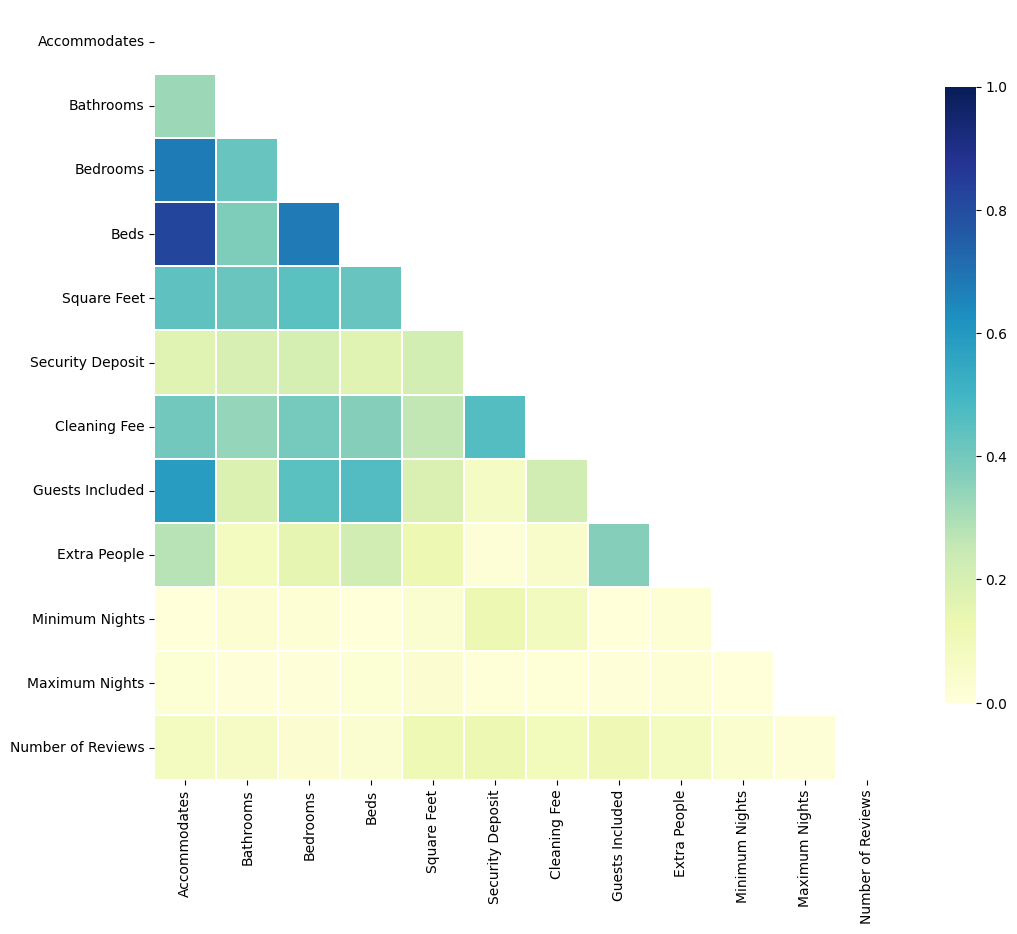

In [31]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(resultados.drop(['Precio'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [32]:
#resultados.iloc[:, 10:]
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10585 entries, 0 to 11823
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Precio               10585 non-null  float64
 1   Zipcode              10224 non-null  object 
 2   Property Type        10585 non-null  object 
 3   Room Type            10585 non-null  object 
 4   Accommodates         10585 non-null  int64  
 5   Bathrooms            10544 non-null  float64
 6   Bedrooms             10569 non-null  float64
 7   Beds                 10545 non-null  float64
 8   Bed Type             10585 non-null  object 
 9   Square Feet          422 non-null    float64
 10  Security Deposit     4520 non-null   float64
 11  Cleaning Fee         6274 non-null   float64
 12  Guests Included      10585 non-null  int64  
 13  Extra People         10585 non-null  int64  
 14  Minimum Nights       10585 non-null  int64  
 15  Maximum Nights       10585 non-null 

Tengo Zipcode, Bathrooms, Bedrooms, Beds, Square Feet, Security Deposit, Cleaning Fee que deberian impotarse los valores ya que tenemos valores NAN

Zipcode imputacion del zipcode mas comun[texto del enlace](https://)

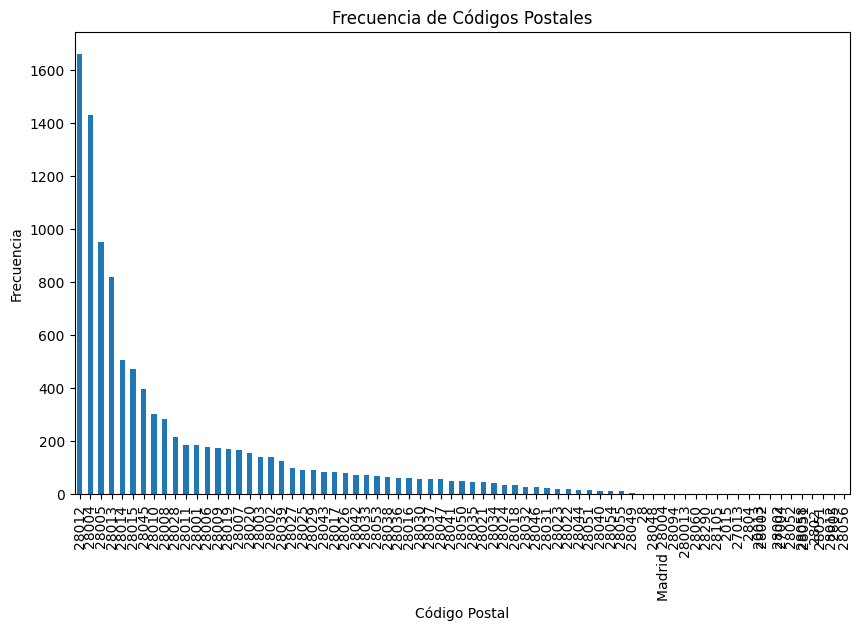

In [33]:
# Cuenta la frecuencia de los códigos postales y ordena los resultados
zipcode_counts = resultados["Zipcode"].value_counts().sort_values(ascending=False)

# Graficar la frecuencia de los códigos postales
plt.figure(figsize=(10, 6))
zipcode_counts.plot(kind="bar")
plt.xlabel("Código Postal")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Códigos Postales")
plt.show()

In [34]:
# Obtener el código postal más común
codigo_postal_comun = zipcode_counts.index[0]

# Imprimir el código postal más común
print("Código Postal más común:", codigo_postal_comun)


Código Postal más común: 28012


In [35]:
zipcode_sin_nan = resultados.dropna(subset=["Zipcode"])


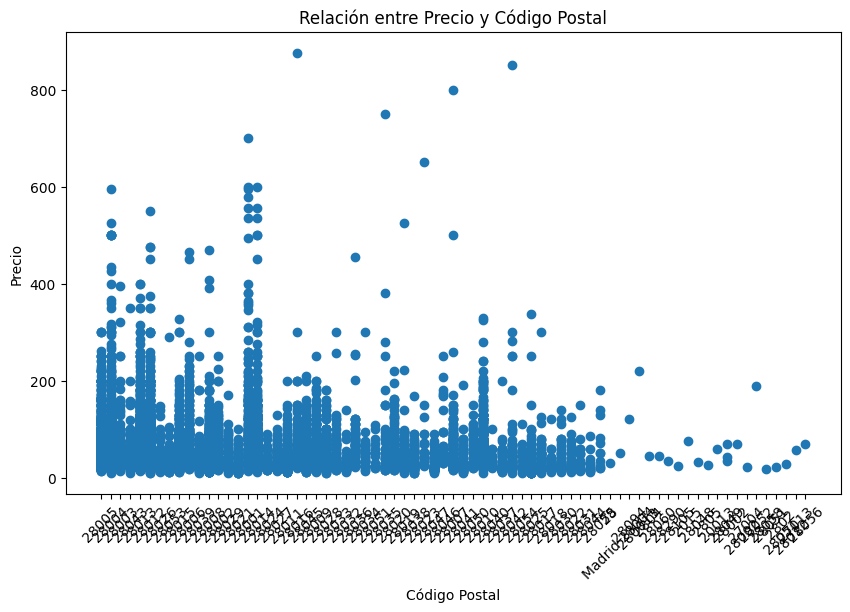

In [36]:
# Visualizar precio y código postal en un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(zipcode_sin_nan["Zipcode"], zipcode_sin_nan["Precio"])
plt.xlabel("Código Postal")
plt.ylabel("Precio")
plt.title("Relación entre Precio y Código Postal")
plt.xticks(rotation=45)
plt.show()

In [37]:
# Filtrar solo el código postal 28012
zipcode_28012 = zipcode_sin_nan[zipcode_sin_nan["Zipcode"] == "28012"]

# Calcula la media y la dispersión de los precios
media = zipcode_28012["Precio"].mean()
dispersion = zipcode_28012["Precio"].std()

# Imprime la media y la dispersión
print("Media:", media)
print("Dispersión:", dispersion)

Media: 66.78842676311031
Dispersión: 47.09072127322409


In [38]:
resultados["Zipcode"].fillna("28012", inplace=True)


Text(0.5, 1.0, 'Distribución de Zipcode (Datos Originales vs Datos Imputados)')

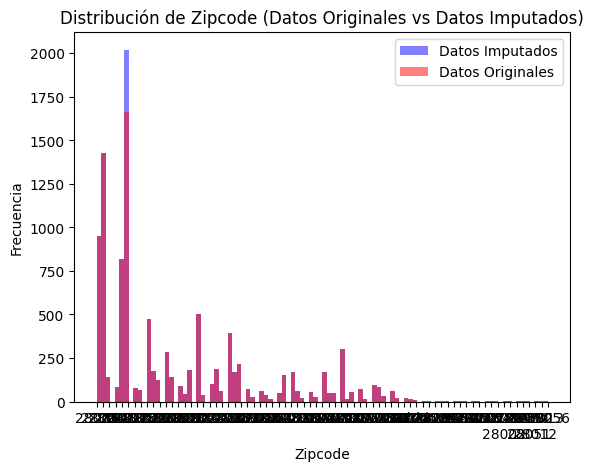

In [39]:
plt.hist(resultados["Zipcode"], bins=100, color="blue", alpha=0.5, label="Datos Imputados")
plt.hist(zipcode_sin_nan["Zipcode"], bins=100, color="red", alpha=0.5, label="Datos Originales")
# Agrega leyendas y títulos al gráfico
plt.legend()
plt.xlabel("Zipcode")
plt.ylabel("Frecuencia")
plt.title("Distribución de Zipcode (Datos Originales vs Datos Imputados)")


In [40]:
# Filtrar solo el código postal 28012
zipcode_28012_imputados = resultados[resultados["Zipcode"] == "28012"]

# Calcula la media y la dispersión de los precios
media = zipcode_28012_imputados["Precio"].mean()
dispersion = zipcode_28012_imputados["Precio"].std()

# Imprime la media y la dispersión
print("Media:", media)
print("Dispersión:", dispersion)

Media: 66.68415841584158
Dispersión: 49.987618541632365


In [41]:
resultados["Zipcode"] = resultados["Zipcode"].str.replace(r'\D', '', regex=True)
resultados["Zipcode"] = resultados["Zipcode"].astype(int)

Imputacion de la mediana a valores NAN en Bathrooms, Bedrooms, Beds, Square Feet, Security Deposit, Cleaning Fee

In [42]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10585 entries, 0 to 11823
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Precio               10585 non-null  float64
 1   Zipcode              10585 non-null  int64  
 2   Property Type        10585 non-null  object 
 3   Room Type            10585 non-null  object 
 4   Accommodates         10585 non-null  int64  
 5   Bathrooms            10544 non-null  float64
 6   Bedrooms             10569 non-null  float64
 7   Beds                 10545 non-null  float64
 8   Bed Type             10585 non-null  object 
 9   Square Feet          422 non-null    float64
 10  Security Deposit     4520 non-null   float64
 11  Cleaning Fee         6274 non-null   float64
 12  Guests Included      10585 non-null  int64  
 13  Extra People         10585 non-null  int64  
 14  Minimum Nights       10585 non-null  int64  
 15  Maximum Nights       10585 non-null 

1.0
Media bathroom antes: 56.413321734808
Dispersión bathroom antes: 35.070709603942156
Media bathroom despues: 56.50024727992087
Dispersión bathroom despues: 35.29857805773364


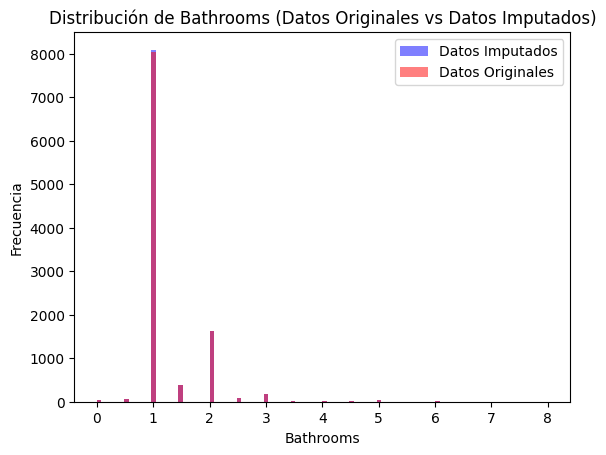

In [43]:
# Imputación con la mediana
median_bathrooms = resultados["Bathrooms"].median()
bathrooms_sin_nan = resultados.dropna(subset=["Bathrooms"])

bathrom_ = bathrooms_sin_nan[bathrooms_sin_nan["Bathrooms"] == median_bathrooms]
print(median_bathrooms)
# Calcula la media y la dispersión de los precios
media = bathrom_["Precio"].mean()
dispersion = bathrom_["Precio"].std()

# Imprime la media y la dispersión
print("Media bathroom antes:", media)
print("Dispersión bathroom antes:", dispersion)


resultados["Bathrooms"].fillna(median_bathrooms, inplace=True)
plt.hist(resultados["Bathrooms"], bins=100, color="blue", alpha=0.5, label="Datos Imputados")
plt.hist(bathrooms_sin_nan["Bathrooms"], bins=100, color="red", alpha=0.5, label="Datos Originales")
# Agrega leyendas y títulos al gráfico
plt.legend()
plt.xlabel("Bathrooms")
plt.ylabel("Frecuencia")
plt.title("Distribución de Bathrooms (Datos Originales vs Datos Imputados)")

bathrom_imputado = resultados[resultados["Bathrooms"] == median_bathrooms]

# Calcula la media y la dispersión de los precios
media = bathrom_imputado["Precio"].mean()
dispersion = bathrom_imputado["Precio"].std()

# Imprime la media y la dispersión
print("Media bathroom despues:", media)
print("Dispersión bathroom despues:", dispersion)

Media Bedrooms antes: 48.66853146853147
Dispersión Bedrooms antes: 33.867259208112294
Media Bedrooms despues: 48.65713089589729
Dispersión Bedrooms despues: 33.85909097946235


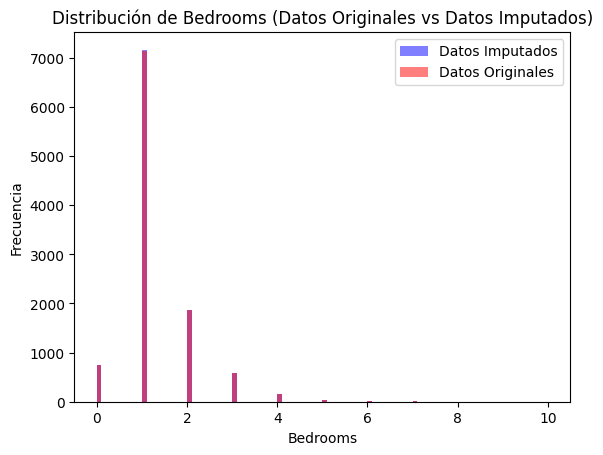

In [44]:
# Imputación con la mediana
median_Bedrooms = resultados["Bedrooms"].median()
Bedrooms_sin_nan = resultados.dropna(subset=["Bedrooms"])

Bedrooms_ = Bedrooms_sin_nan[Bedrooms_sin_nan["Bedrooms"] == median_Bedrooms]

# Calcula la media y la dispersión de los precios
media = Bedrooms_["Precio"].mean()
dispersion = Bedrooms_["Precio"].std()

# Imprime la media y la dispersión
print("Media Bedrooms antes:", media)
print("Dispersión Bedrooms antes:", dispersion)
resultados["Bedrooms"].fillna(median_Bedrooms, inplace=True)

plt.hist(resultados["Bedrooms"], bins=100, color="blue", alpha=0.5, label="Datos Imputados")
plt.hist(Bedrooms_sin_nan["Bedrooms"], bins=100, color="red", alpha=0.5, label="Datos Originales")
# Agrega leyendas y títulos al gráfico
plt.legend()
plt.xlabel("Bedrooms")
plt.ylabel("Frecuencia")
plt.title("Distribución de Bedrooms (Datos Originales vs Datos Imputados)")

Bedrooms_imputado = resultados[resultados["Bedrooms"] == median_bathrooms]

# Calcula la media y la dispersión de los precios
media = Bedrooms_imputado["Precio"].mean()
dispersion = Bedrooms_imputado["Precio"].std()

# Imprime la media y la dispersión
print("Media Bedrooms despues:", media)
print("Dispersión Bedrooms despues:", dispersion)

Media Beds antes: 44.74094443390859
Dispersión Beds antes: 32.06154614041004
Media Beds despues: 44.900621118012424
Dispersión Beds despues: 32.41258961194079


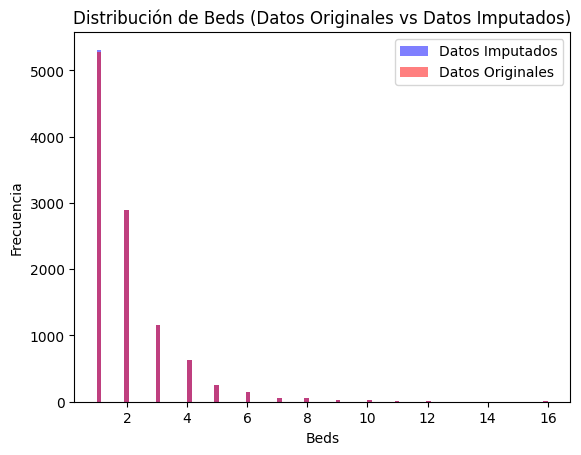

In [45]:
# Imputación con la mediana
median_Beds = resultados["Beds"].median()
Beds_sin_nan = resultados.dropna(subset=["Beds"])

Beds_ = Beds_sin_nan[Beds_sin_nan["Beds"] == median_Beds]

# Calcula la media y la dispersión de los precios
media = Beds_["Precio"].mean()
dispersion = Beds_["Precio"].std()

# Imprime la media y la dispersión
print("Media Beds antes:", media)
print("Dispersión Beds antes:", dispersion)
resultados["Beds"].fillna(median_Beds, inplace=True)

plt.hist(resultados["Beds"], bins=100, color="blue", alpha=0.5, label="Datos Imputados")
plt.hist(Beds_sin_nan["Beds"], bins=100, color="red", alpha=0.5, label="Datos Originales")
# Agrega leyendas y títulos al gráfico
plt.legend()
plt.xlabel("Beds")
plt.ylabel("Frecuencia")
plt.title("Distribución de Beds (Datos Originales vs Datos Imputados)")

Beds_imputado = resultados[resultados["Beds"] == median_bathrooms]

# Calcula la media y la dispersión de los precios
media = Beds_imputado["Precio"].mean()
dispersion = Beds_imputado["Precio"].std()

# Imprime la media y la dispersión
print("Media Beds despues:", media)
print("Dispersión Beds despues:", dispersion)

Security Deposit

Media Security Deposit antes: 73.3849710982659
Dispersión Security Deposit antes: 33.597233210879835
Media Security Deposit despues: 58.42150072150072
Dispersión Security Deposit despues: 52.713276659766166


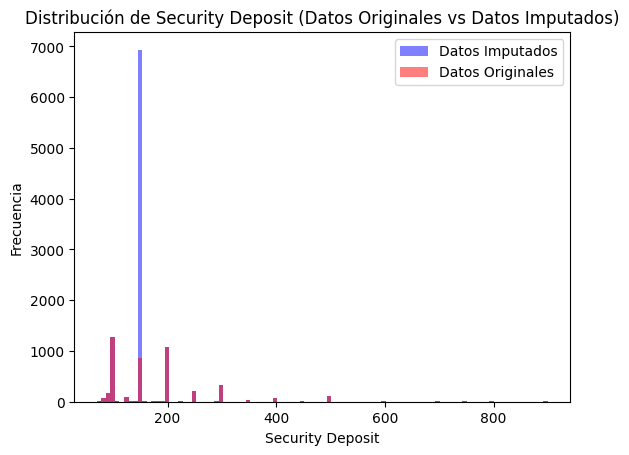

In [46]:
# Imputación con la mediana
median_SD= resultados["Security Deposit"].median()
SD_sin_nan = resultados.dropna(subset=["Security Deposit"])

SD_ = SD_sin_nan[SD_sin_nan["Security Deposit"] == median_SD]

# Calcula la media y la dispersión de los precios
media = SD_["Precio"].mean()
dispersion = SD_["Precio"].std()

# Imprime la media y la dispersión
print("Media Security Deposit antes:", media)
print("Dispersión Security Deposit antes:", dispersion)
resultados["Security Deposit"].fillna(median_SD, inplace=True)

plt.hist(resultados["Security Deposit"], bins=100, color="blue", alpha=0.5, label="Datos Imputados")
plt.hist(SD_sin_nan["Security Deposit"], bins=100, color="red", alpha=0.5, label="Datos Originales")
# Agrega leyendas y títulos al gráfico
plt.legend()
plt.xlabel("Security Deposit")
plt.ylabel("Frecuencia")
plt.title("Distribución de Security Deposit (Datos Originales vs Datos Imputados)")

SD_imputado = resultados[resultados["Security Deposit"] == median_SD]

# Calcula la media y la dispersión de los precios
media = SD_imputado["Precio"].mean()
dispersion = SD_imputado["Precio"].std()

# Imprime la media y la dispersión
print("Media Security Deposit despues:", media)
print("Dispersión Security Deposit despues:", dispersion)

Cleaning Fee

Media Cleaning Fee antes: 65.12115732368898
Dispersión Cleaning Fee antes: 25.069283794367227
Media Cleaning Fee despues: 55.35690789473684
Dispersión Cleaning Fee despues: 49.53834252157674


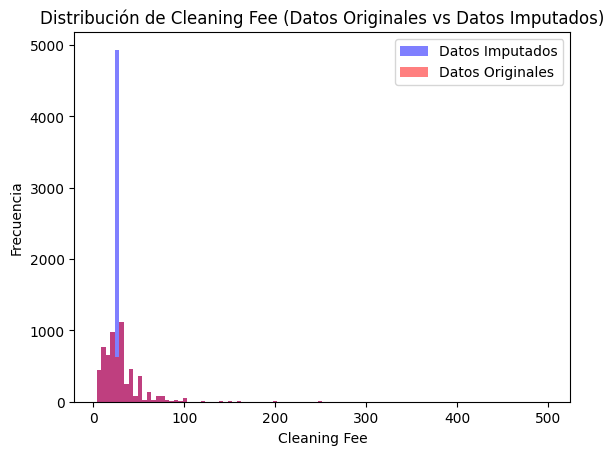

In [47]:
# Imputación con la mediana
median_CF= resultados["Cleaning Fee"].median()
CF_sin_nan = resultados.dropna(subset=["Cleaning Fee"])

CF_ = CF_sin_nan[CF_sin_nan["Cleaning Fee"] == median_CF]

# Calcula la media y la dispersión de los precios
media = CF_["Precio"].mean()
dispersion = CF_["Precio"].std()

# Imprime la media y la dispersión
print("Media Cleaning Fee antes:", media)
print("Dispersión Cleaning Fee antes:", dispersion)
resultados["Cleaning Fee"].fillna(median_CF, inplace=True)

plt.hist(resultados["Cleaning Fee"], bins=100, color="blue", alpha=0.5, label="Datos Imputados")
plt.hist(CF_sin_nan["Cleaning Fee"], bins=100, color="red", alpha=0.5, label="Datos Originales")
# Agrega leyendas y títulos al gráfico
plt.legend()
plt.xlabel("Cleaning Fee")
plt.ylabel("Frecuencia")
plt.title("Distribución de Cleaning Fee (Datos Originales vs Datos Imputados)")

CF_imputado = resultados[resultados["Cleaning Fee"] == median_CF]

# Calcula la media y la dispersión de los precios
media = CF_imputado["Precio"].mean()
dispersion = CF_imputado["Precio"].std()

# Imprime la media y la dispersión
print("Media Cleaning Fee despues:", media)
print("Dispersión Cleaning Fee despues:", dispersion)

In [48]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10585 entries, 0 to 11823
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Precio               10585 non-null  float64
 1   Zipcode              10585 non-null  int64  
 2   Property Type        10585 non-null  object 
 3   Room Type            10585 non-null  object 
 4   Accommodates         10585 non-null  int64  
 5   Bathrooms            10585 non-null  float64
 6   Bedrooms             10585 non-null  float64
 7   Beds                 10585 non-null  float64
 8   Bed Type             10585 non-null  object 
 9   Square Feet          422 non-null    float64
 10  Security Deposit     10585 non-null  float64
 11  Cleaning Fee         10585 non-null  float64
 12  Guests Included      10585 non-null  int64  
 13  Extra People         10585 non-null  int64  
 14  Minimum Nights       10585 non-null  int64  
 15  Maximum Nights       10585 non-null 

Si imputo por una valor constante como en los casos anteriores estaria rellenando casi el 96 % de los datos de Square Feet. Asi que esta caracteristica no se usara para entrenar el modelo

In [49]:
resultados.drop("Square Feet", axis=1, inplace=True)


In [50]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10585 entries, 0 to 11823
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Precio               10585 non-null  float64
 1   Zipcode              10585 non-null  int64  
 2   Property Type        10585 non-null  object 
 3   Room Type            10585 non-null  object 
 4   Accommodates         10585 non-null  int64  
 5   Bathrooms            10585 non-null  float64
 6   Bedrooms             10585 non-null  float64
 7   Beds                 10585 non-null  float64
 8   Bed Type             10585 non-null  object 
 9   Security Deposit     10585 non-null  float64
 10  Cleaning Fee         10585 non-null  float64
 11  Guests Included      10585 non-null  int64  
 12  Extra People         10585 non-null  int64  
 13  Minimum Nights       10585 non-null  int64  
 14  Maximum Nights       10585 non-null  int64  
 15  Number of Reviews    10585 non-null 

Varias caracteristicas deben categorizarse para en caso se usa one hot encoding asi las variables de tipo texto pasan a forma vectores numéricos.

In [51]:
columnas_categorical = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']
print(resultados["Property Type"].unique())
print(resultados["Room Type"].unique())
print(resultados["Bed Type"].unique())
print(resultados["Cancellation Policy"].unique())

# Aplica one-hot encoding a la columnas
one_hot_encoded = pd.get_dummies(resultados, columns= columnas_categorical)
one_hot_encoded.head()

['Apartment' 'House' 'Villa' 'Other' 'Loft' 'Bed & Breakfast' 'Chalet'
 'Condominium' 'Townhouse' 'Hostel' 'Boutique hotel' 'Serviced apartment'
 'Guest suite' 'Bungalow' 'Dorm' 'Guesthouse' 'Earth House'
 'Casa particular' 'Camper/RV' 'Boat' 'Tent' 'Timeshare']
['Entire home/apt' 'Private room' 'Shared room']
['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']
['moderate' 'strict' 'flexible' 'super_strict_60' 'super_strict_30']


,Precio,Zipcode,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,64.0,28005,4,1.0,0.0,2.0,150.0,25.0,2,15,...,0,0,0,0,1,0,1,0,0,0
2,124.0,28004,4,1.0,2.0,2.0,200.0,40.0,2,20,...,0,0,0,0,1,0,0,1,0,0
3,69.0,28003,4,2.0,2.0,2.0,150.0,25.0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,155.0,28043,12,3.0,4.0,12.0,150.0,65.0,8,15,...,0,0,0,0,1,0,0,1,0,0
5,31.0,28013,1,3.0,1.0,1.0,200.0,30.0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [52]:
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10585 entries, 0 to 11823
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Precio                               10585 non-null  float64
 1   Zipcode                              10585 non-null  int64  
 2   Accommodates                         10585 non-null  int64  
 3   Bathrooms                            10585 non-null  float64
 4   Bedrooms                             10585 non-null  float64
 5   Beds                                 10585 non-null  float64
 6   Security Deposit                     10585 non-null  float64
 7   Cleaning Fee                         10585 non-null  float64
 8   Guests Included                      10585 non-null  int64  
 9   Extra People                         10585 non-null  int64  
 10  Minimum Nights                       10585 non-null  int64  
 11  Maximum Nights              

A continuacion visualizo mis caracteristicas para comprobar si todas son utiles. Usando F test y Informacion mutua parece que usar one hot encoding no es importante aunque dos de ellas destacan en el tipo de habiatacion. Debido a estos resultados continuare con todas las caracteristicas a delante.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


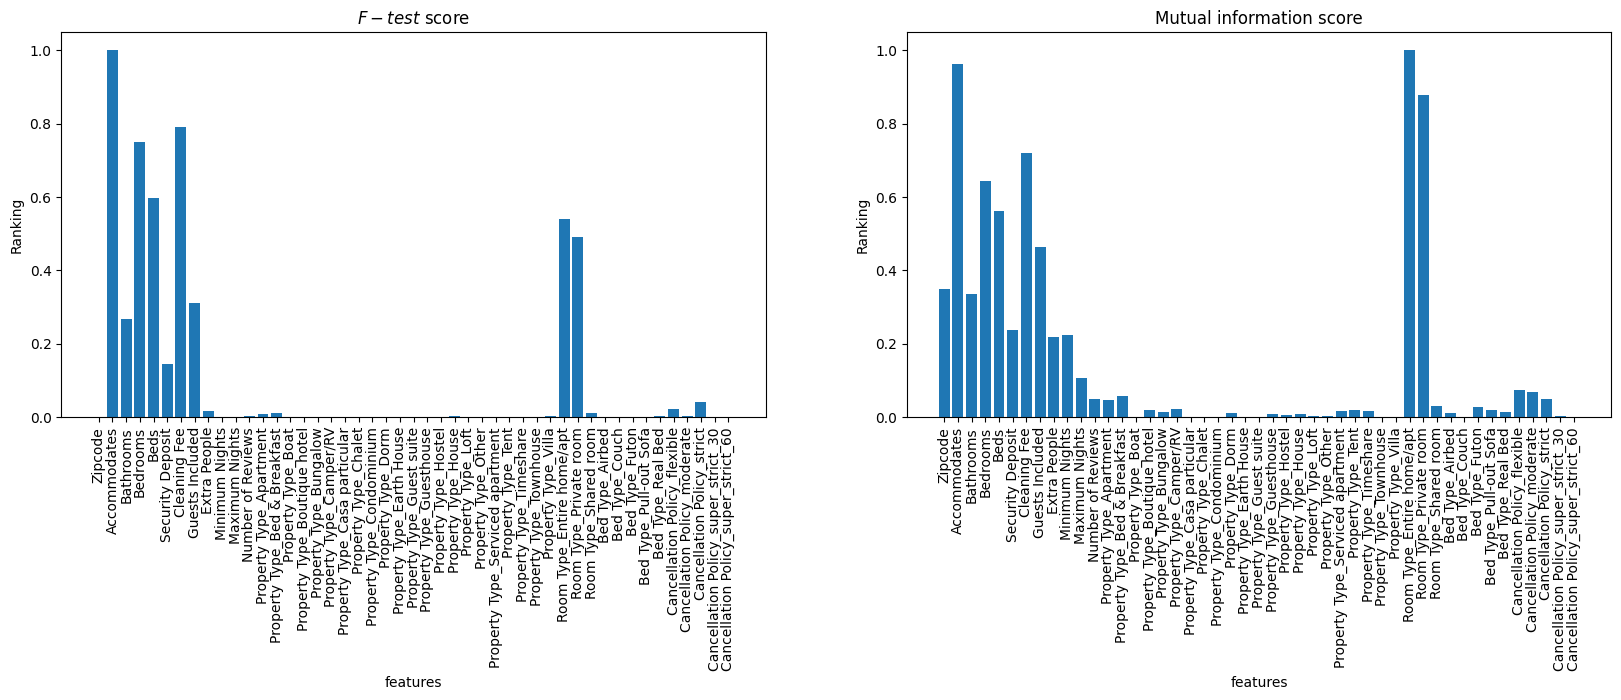

In [53]:
from sklearn.feature_selection import f_regression, mutual_info_regression

# convertimos el DataFrame al formato necesario para scikit-learn
data = one_hot_encoded.values

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = one_hot_encoded.columns[1:]


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

# Modelado

## RandomForestRegressor

In [56]:
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10585 entries, 0 to 11823
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Precio                               10585 non-null  float64
 1   Zipcode                              10585 non-null  int64  
 2   Accommodates                         10585 non-null  int64  
 3   Bathrooms                            10585 non-null  float64
 4   Bedrooms                             10585 non-null  float64
 5   Beds                                 10585 non-null  float64
 6   Security Deposit                     10585 non-null  float64
 7   Cleaning Fee                         10585 non-null  float64
 8   Guests Included                      10585 non-null  int64  
 9   Extra People                         10585 non-null  int64  
 10  Minimum Nights                       10585 non-null  int64  
 11  Maximum Nights              

## Train

In [57]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
data = one_hot_encoded.values

y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

X_train = XtrainScaled

# Test

In [58]:
dataTest = pd.read_csv('test.csv', sep=';', decimal='.')
dataTest.rename(columns={'Price': 'Precio'}, inplace=True)
# Extraer la columna "Precio"
price_column = dataTest['Precio']

# Eliminar la columna "Precio" del dataTestTestFrame
dataTest.drop('Precio', axis=1, inplace=True)

# Insertar la columna "Price" en la primera posición del dataTestTestFrame
dataTest.insert(0, 'Precio', price_column)

dataTest = dataTest.dropna(subset=["City"])
# Filtra los valores de la columna "City" que contienen "Madrid" (sin distinguir mayúsculas y minúsculas)
filtro = dataTest["City"].str.contains("Madrid", case=False)

# Aplica el filtro al dataTestTestTestFrame
resultadosTest = dataTest[filtro]
# Elimina las columnas especificadas del dataTestTestTestFrame
columnas_a_eliminar = ["ID","Listing Url","Scrape ID","Last Scraped","Name","Summary","Space","Description",
                       "Experiences Offered","Neighborhood Overview","Notes","Transit","Access","Interaction",
                       "House Rules","Thumbnail Url","Medium Url","Picture Url","XL Picture Url",
                       "Host ID","Host URL","Host Name","Host Since","Host Location",
                       "Host About", "Host Response Time", "Host Response Rate", "Host Acceptance Rate",
                       "Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood", "Host Listings Count",
                       "Host Total Listings Count", "Host Verifications", "Street", "Neighbourhood",
                       "Neighbourhood Cleansed", "Neighbourhood Group Cleansed", "City","State", "Market", "Smart Location",
                       "Country Code", "Country", "Latitude", "Longitude", "Amenities", "Weekly Price", "Monthly Price", "Calendar Updated",
                       "Has Availability","Availability 30","Availability 60","Availability 90","Availability 365","Calendar last Scraped","First Review",
                       "Last Review","Review Scores Rating","Review Scores Accuracy","Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication",
                       "Review Scores Location","Review Scores Value","License","Jurisdiction Names","Calculated host listings count","Reviews per Month",
                       "Geolocation","Features"]
resultadosTest = resultadosTest.drop(columns=columnas_a_eliminar)

resultadosTest = resultadosTest[resultadosTest["Precio"].notna()]
resultadosTest["Zipcode"].fillna("28012", inplace=True)
resultadosTest["Bathrooms"].fillna(median_bathrooms, inplace=True)
resultadosTest["Bedrooms"].fillna(median_Bedrooms, inplace=True)

resultadosTest["Beds"].fillna(median_Beds, inplace=True)
resultadosTest["Security Deposit"].fillna(median_SD, inplace=True)
resultadosTest["Cleaning Fee"].fillna(median_CF, inplace=True)
resultadosTest.drop("Square Feet", axis=1, inplace=True)

columnas_categorical = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']
one_hot_encodedTest = pd.get_dummies(resultadosTest, columns= columnas_categorical)
columnas_dataset1 = set(one_hot_encoded.columns)
columnas_dataset2 = set(one_hot_encodedTest.columns)
columnas_exclusivas_dataset1 = columnas_dataset1 - columnas_dataset2
columnas_exclusivas_dataset2 = columnas_dataset2 - columnas_dataset1
columnas_exclusivas = columnas_exclusivas_dataset1.union(columnas_exclusivas_dataset2)
columnas_exclusivas = list(columnas_exclusivas)  # Convertir el conjunto en una lista
zeros_df = pd.DataFrame(0, index=one_hot_encodedTest.index, columns=columnas_exclusivas)
one_hot_encodedTest = pd.concat([one_hot_encodedTest, zeros_df], axis=1)

,Precio,Zipcode,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60,Bed Type_Airbed,Property Type_Boutique hotel,Property Type_Boat,Property Type_Camper/RV,Property Type_Timeshare,Property Type_Villa,Property Type_Tent,Property Type_Bungalow
0,35.0,28012,1,1.5,1.0,1.0,150.0,20.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,28005,1,2.0,1.0,1.0,150.0,25.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,20.0,28004,1,1.0,1.0,1.0,150.0,25.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,80.0,28004,3,1.0,1.0,1.0,250.0,20.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,28012,2,1.0,1.0,1.0,150.0,25.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,70.0,28005,6,1.0,2.0,3.0,100.0,25.0,2,12,...,0,0,0,0,0,0,0,0,0,0
2951,70.0,28015,4,1.0,1.0,2.0,150.0,25.0,2,0,...,0,0,0,0,0,0,0,0,0,0
2952,70.0,28012,2,1.0,1.0,1.0,150.0,25.0,1,5,...,0,0,0,0,0,0,0,0,0,0
2954,95.0,28012,4,1.0,1.0,2.0,150.0,30.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
dTest = one_hot_encodedTest.values

y_test = dTest[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = dTest[:,1:]      # nos quedamos con el resto


# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

X_test = XtestScaled

## RandomForestRegressor

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

best mean cross-validation score: 0.606
best parameters: {'max_depth': 9}


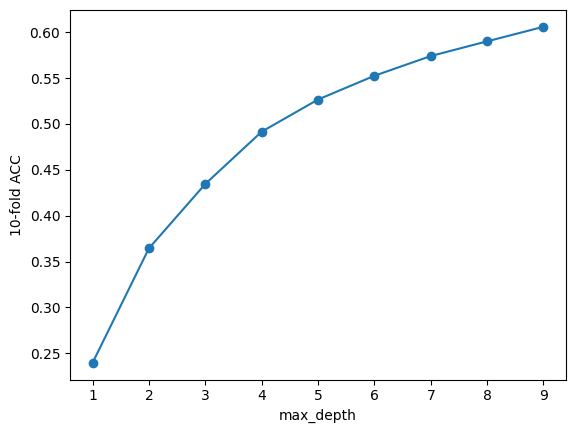

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# grid search
maxDepth = range(1,10)
n_estimators = [100, 200, 300, 500, 1000, 1500, 2000]
#tuned_parameters = {'max_depth': maxDepth, 'n_estimators': n_estimators}
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [61]:
maxDepthOptimo = grid.best_params_['max_depth']
rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)
#rf = RandomForestRegressor(max_depth=5,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",rf.score(X_train,y_train))
print("Test: ",rf.score(X_test,y_test))
#maxDepthOptimo
#Train:  0.8988356238079015
#Test:  0.3690618281967766

<ipython-input-61-4aef67fa9ca6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)


Train:  0.7020727633999333
Test:  0.3562489294643716


## DecisionTreeRegressor

best mean cross-validation score: 0.551
best parameters: {'max_depth': 7}


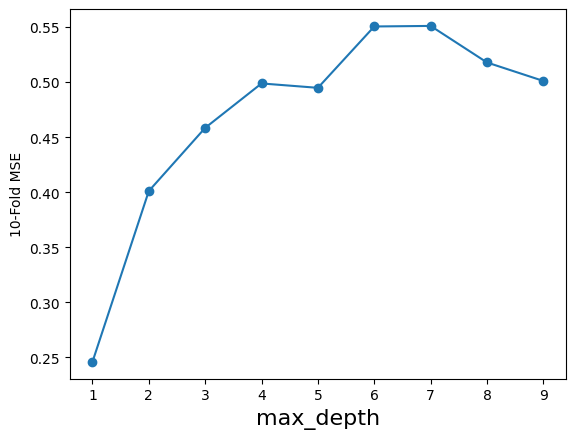

In [62]:
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 3)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [63]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.6949563966741761
Test:  0.1434099235948526


## BaggingRegressor

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversion

best mean cross-validation score: 0.616
best parameters: {'base_estimator__max_depth': 9}


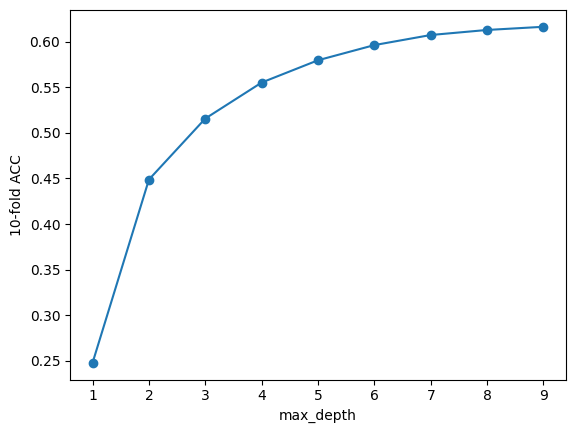

In [64]:
from sklearn.ensemble import BaggingRegressor

# grid search
maxDepth = range(1,10)
n_estimators = [100, 200, 300, 500, 1000, 1500, 2000]
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(
    BaggingRegressor(
        base_estimator=DecisionTreeRegressor(),
        random_state=0,
        n_estimators=200),
    param_grid=tuned_parameters,
    cv=3
)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [65]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
bagModel = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),
        random_state=0,
        n_estimators=200).fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train:  0.7726294795245217
Test:  0.35628731173853223


## GradientBoostingRegressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

best mean cross-validation score: 0.664
best parameters: {'learning_rate': 0.05, 'n_estimators': 1500}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


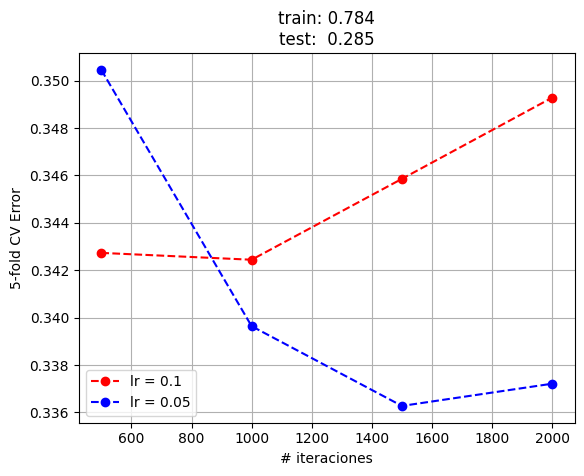

In [67]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

##  XGBoost y LightGBM

In [68]:
### XGBOOST
from xgboost import XGBRegressor

bt = XGBRegressor(random_state=0, max_depth=3,learning_rate=0.01, n_estimators=500)
bt.fit(X_train,y_train)

print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

Train:  0.6811611087455461
Test:  0.4448158324591752


In [69]:
### LightGBM
import lightgbm as lgb

bt = lgb.LGBMRegressor(random_state=0, max_depth=3,learning_rate=0.01, n_estimators=500)
bt.fit(X_train,y_train)

print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train:  0.6677990746667606
Test:  0.4461108804177676


## Conclusión

Los modelos tienen overfitting, puede deberse a usar demasiados datos categóricos, la selección no ha sido la correcta y se debería mejorar agregando una selección wrapper o embedded. Además debería lanzar una mayor numero de hyperparametros para poder obtener un mejor modelo es decir explorar más la configuración.

Todos los modelos han tenido unos valores bajísimos de R2 aunque XGBoost y lightgbm parecen tener una cierta capacidad para predecir los precios de viviendas. También podría probar agregado técnicas de regularización como Lasso como ya mencioné y ajustar la tasa de aprendizaje para encontrar la configuración óptima.